# Clasificador Naive Bayes

El clasificador _Naive Bayes_, o _Bayes Ingenuo_ en español, es un modelo no parámetrico de clasificación basado en el teorema de Bayes.
De forma semejante al _Discriminante Lineal_, se hacen hipótesis sobre algunas de las propiedades de los datos. Supóngase que se tiene
un problema de clasificación de $J$ clases y se quiere encontrar a qué clase pertenece. Primero, se asume que se conoce la densidad
de probabilidad $\hat{f}_j(X)$ de cada clase $j = 1, \cdots, J$, así como las probabilidades _a priori_ $\hat{\pi}_j$, entonces del
teorema de Bayes se tiene la siguiente probabilidad _a posteriori_ para la predicción de clases

$$\hat{\text{Pr}}(G = j \vert X = x_0) = \frac{\hat{\pi}_j \hat{f}_j(x_0)}{\sum_{k=1}^{J}\hat{\pi}_k \hat{f}_k(x_0)}$$

sin embargo, en realidad no se conoce nada aquí más que las probabilidades _a priori_. ¿Cuál es la diferencia entre otros métodos discriminantes y 
Naive Bayes?

## La Estimación de Máxima Verosimilitud

Para que el clasificador se considere de tipo _Naive Bayes_ se asume que dada una clase $G=j$, las características $X_k$ son variables aleatorias
independientes tal que cumplen lo siguiente

$$f_j(X) = \prod_{k=1}^{p} f_{jk}(X_k) $$

y es de esta hipótesis de donde surge el nombre de _Bayes Ingenuo_ dado que esto no siempre se cumple; de hecho es muy raro que algo de esto se cumpla.
¿Porqué? Lo que esta expresión está diciendo es que no existe relación entre las características del conjunto de datos, pero este simple hecho es algo
que no tiene mucho sentido en un método donde se pretende encontrar la _relación entre datos._

Pero aún así es un clasificador muy robusto por dos razones fundamentales:

- Al asumir que son variables independientes las densidades de probabilidad $f_{jk}$ pueden estimarse por separado, utilizando cualquier tipo de 
  distribución conocida, siendo la más popular la distribución Gaussiana pero puede emplearse cualquier otro tipo de distribución, todo esto depende
  del tipo de datos.

- Si algún componente $X_j$ de $X$ es una variable discreta, entonces se puede construir un histograma correspondiente y se puede facilitar la mezclas
  de las características correspondientes, lo que permite asumir que los datos efectivamente provienen de la misma distribución de probabilidad.

Este documento se enfoca en considerar que los datos pertenecen a una distribución Gaussiana normal multivariada, esto es que siguen la siguiente expresión

$$f_k (x) = \frac{1}{(2\pi)^{p/2}|\mathbf{\mathbf{C}_k}|^{1/2}} e^{-\frac{1}{2}(x-\mu_k)^T \mathbf{\mathbf{C}_k}^{-1} (x-\mu_k)}$$

y a continuación se hablará sobre dos aspectos fundamentales de este método, la **matriz de covarianza** y la métrica generalizada de _Mahalanobis._

## Sobre la matriz de covarianza

La _matriz de covarianza_ determina la relación entre las características del conjunto de datos. En términos simples corresponde a la generalización
de la desviación estándar en dimensiones superiores. Para emplear el método de _Gaussian Naive Bayes_ se debe calcular esta matrix por cada conjunto
de datos de cada clase, y la forma usual de realizar este cálculo es utilizando la siguiente expresión:
  
$$ \mathbf{C} = \frac{1}{n-1} \sum^{n}_{k=1} (\mathbf{x - \mu_k})(\mathbf{x - \mu_k})^{\intercal} $$

donde $\mu_k$ es la media de cada clase y $n$ es el número total de datos de esa clase.

Pero se asume que las características deben ser variables independientes entre sí por lo que la matriz de covarianza debe ser una matriz diagonal.
Esto puede ser un problema numérico si no se trata de forma adecuada, dado si la matriz es degenerada puede resultar en valores indeterminados.
Adicionalmente, la matriz de covarianza debe calcularse por cada clase en el conjunto de datos.

## La Distancia de Mahalanobis

La _distancia de Mahalanobis_ es una métrica muy especial y particular dentro del análisis funcional y la teoría de la probabilidad.
Esta distancia tiene la siguiente forma:

$${\lVert \mathbf{x - \mu} \rVert}^{2} = (\mathbf{x - \mu})^{\intercal} \mathbf{C^{-1}} (\mathbf{x - \mu})$$

Esta métrica es complicada de desarrollar en este documento, por lo que se remite al lector a las referencias al final. Sin embargo, se puede dar
una explicación intuitiva de esta distancia. Esta distancia es muy especial porque determina la distancia de un punto $x$ a una _distribución de probabilidad_
con medio $\mu$ y matriz de covarianza $\mathbf{C}$. En el caso de _Gaussian Naive Bayes_ esto es lo que se pretende encontrar, la distancia de que
un punto a clasificar pertenezca a una clase particular dependiendo de su distancia probabilística; entre más cerca esté se considera que es parte de
esa distribución de probabilidad.

## Regla decisión de Bayes de mínimo riesgo y la función de decisión

Por último, juntando toda la teoría y métodos que se han presentado en este documento, se define la _regla de decisión de Bayes de mínimo riesgo_ que
se puede sintetizar como sigue:

 > Seleccionar la _clase_ con la mayor probabilidad _a posteriori_ cuando las decisiones tienen cero pérdidas y las decisiones incorrectas el mismo peso.

Esta regla de decisión se puede transcribir en una expresión matemática empleando el teorema de Bayes y se obtiene lo siguiente:

$$
h_{k}(\mathbf{x}) = - \frac{1}{2}(\mathbf{x - \mu_k})^{\intercal}\mathbf{C}^{-1}_{k}(\mathbf{x - \mu_k})-\frac{d}{2}\ln{2\pi}-\frac{1}{2}\log{\lvert \mathbf{C}_{k} \rvert}
+\ln{\hat{\pi}_k}
$$

donde $d$ es la dimensión del espacio en el que se está trabajando.

De esta forma se pretende encontrar el máximo valor de $h_k$ por cada clase $k$ y se ha clasificado el nuevo valor $\mathbf{x}$.

In [7]:
import matplotlib
matplotlib.rcParams["figure.figsize"] = (21, 12)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

sns.set()

(1500, 2)


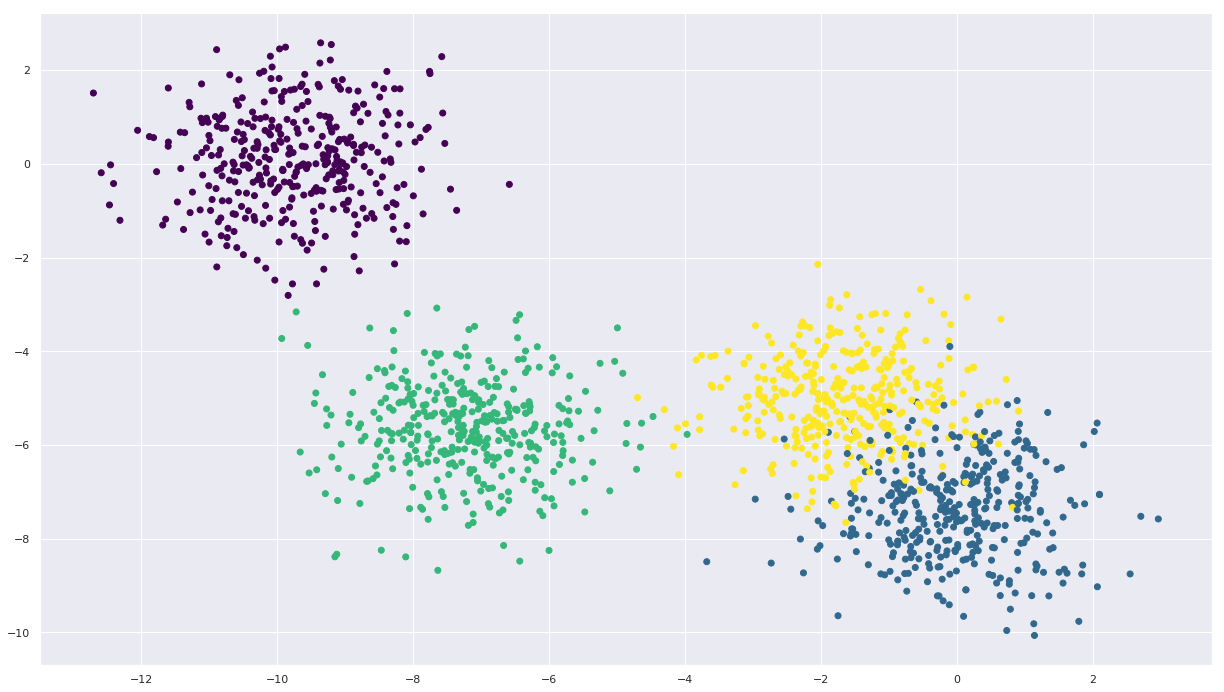

In [8]:
# Crear un conjunto de clases que provengan de una distribución normal Gaussiana
valores_clases, etiq_clases = make_blobs(1500, n_features=2, centers=4, random_state=9)
print(valores_clases.shape)

# Separar el conjunto de datos para hacer unos de entrenamiento y otros de prueba
X_train, X_test, y_train, y_test = train_test_split(
    valores_clases, etiq_clases, test_size=0.35, random_state=5, shuffle=False
)
# Graficar las clases obtenidas
plt.scatter(valores_clases[:, 0], valores_clases[:, 1], c=etiq_clases, cmap="viridis")

Es útil notar que las clases tienen por diseño una distribución normal, sin embargo esto no siempre es el caso pero gracias al Teorema del Límite Central se podrá emplear este método siempre y cuando se tengan muchos datos disponibles para clasificar.

In [9]:
# Implementación hecha por Edwin Bedolla

class GNaiveBayes:
    def __init__(self):
        self.lista_inv_covarianza = list()
        self.lista_covarianza = list()
        self.medias = list()
        self.a_priori = np.array([])
        self.resultado_parcial = list()

    def inicializar(self, datos, clases):
        # Inicializar los valores de las probabilidades a priori
        valores_clases = list(set(clases))
        total_puntos = len(datos)
        for i in valores_clases:
            self.a_priori = np.append(
                self.a_priori, len(clases[clases == i]) / total_puntos
            )
            # Calcular las medias de cada clase
            self.medias.append(datos[clases == i].mean(axis=0))
            # Calcular la matriz de covarianza, diferente para cada clase
            covarianza = np.cov(datos[clases == i], rowvar=False)
            self.lista_covarianza.append(covarianza)
            # También calcular la inversa de la matriz de covarianza
            self.lista_inv_covarianza.append(np.linalg.pinv(covarianza))

        self.medias = np.array(self.medias)

    def entrenamiento(self, datos, clases):
        # Convertir a np.array
        datos = np.array(datos)
        # Se inicializan todos los valores
        self.inicializar(datos, clases)
        # Se calcula el primer producto interno
        for i in self.lista_covarianza:
            # Calcular el pseudo-determinante
            eig_values = np.linalg.eigvals(i)
            pseudo_determinante = np.product(eig_values[eig_values > 0])
            self.resultado_parcial.append(-0.5 * np.log(pseudo_determinante))

        self.resultado_parcial = np.array(self.resultado_parcial)
        # Sumar el logaritmo de las probabilidades a priori
        self.resultado_parcial += np.log(self.a_priori) - 0.5 * datos.shape[0] * np.log(
            2.0 * np.pi
        )

    def prediccion(self, datos):
        # Convertir a np.array
        datos = np.array(datos)
        # Crear el arreglo vacío con el tamaño correcto
        clasificacion = np.zeros((len(datos), len(self.medias)))
        # Utilizar el resultado entrenado
        for l, i in enumerate(self.medias):
            for k, d in enumerate(datos):
                # Restar la media a cada dato
                delta_datos = d - i
                multiplicacion = self.lista_inv_covarianza[l] @ delta_datos
                clasificacion[k, l] = (
                    -0.5 * (delta_datos.T @ multiplicacion) + self.resultado_parcial[l]
                )

        return np.argmax(clasificacion, axis=1)

In [10]:
# Instanciar, entrenar, predecir y mostrar el resultado obtenido
gnb_clf = GNaiveBayes()
gnb_clf.entrenamiento(X_train, y_train)
resultado = gnb_clf.prediccion(X_test)
print(classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.92      0.94      0.93       131
           2       0.99      0.99      0.99       112
           3       0.93      0.92      0.93       139

   micro avg       0.96      0.96      0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



In [11]:
# Comprobar con la implementación de scikit-learn
sk_clf = GaussianNB()
sk_clf.fit(X_train, y_train)
resultado = sk_clf.predict(X_test)
print(classification_report(y_test, resultado))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       143
           1       0.92      0.94      0.93       131
           2       0.99      0.99      0.99       112
           3       0.93      0.92      0.93       139

   micro avg       0.96      0.96      0.96       525
   macro avg       0.96      0.96      0.96       525
weighted avg       0.96      0.96      0.96       525



Ambas implementaciones proporcionan los mismos resultados, por lo que se puede tener una cierta seguridad que el método presentado aquí es correcto. A continuación se muestra un ejemplo más complejo de clasificación.

## Digítos numéricos escritos a mano

El siguiente ejemplo es con un conjunto de datos real que proviene de imágenes de dígitos numéricos realizados por personas y recuperado por el NIST. En la siguiente [liga](https://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits) se puede visitar y recuperar el conjunto de datos.

Aquí se pretende comparar la eficiencia y precisión de ambas implementaciones mediante la clasificación de los datos correspondientes.

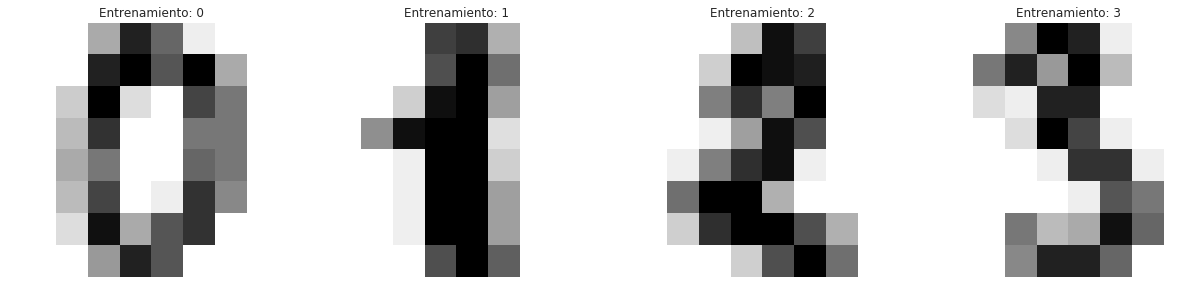

In [12]:
# Tomado de https://tinyurl.com/yawllzn4 y modificado para este documento

# Importar los datos
from sklearn import datasets

# Base de datos de dígitos
digits = datasets.load_digits()

# Mostrar los primeros cuatro dígitos que sirvan como entrenamiento
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:4]):
    plt.subplot(2, 4, index + 1)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Entrenamiento: %i" % label)

# Para hacer uso de las imágenes se deben de convertir las imágenes a arreglos
n_samples = len(digits.images)
data = digits.images.reshape((n_samples, -1))

In [13]:
# Instanciar los clasificadores
classifier = GaussianNB()
gnb_clf = GNaiveBayes()

# Entrenarlos con la mitad del conjunto de datos disponible, las imágenes de arriba
classifier.fit(data[: n_samples // 2], digits.target[: n_samples // 2])
gnb_clf.entrenamiento(data[: n_samples // 2], digits.target[: n_samples // 2])

# Predecir la otra mita de datos, dígitos que no conocen los clasificadores
expected = digits.target[n_samples // 2 :]
predicted = classifier.predict(data[n_samples // 2 :])
resultado = gnb_clf.prediccion(data[n_samples // 2 :])

In [14]:
print(
    "Reporte de clasificación para la implementación de sklearn %s:\n%s\n"
    % (classifier, classification_report(expected, predicted))
)

Reporte de clasificación para la implementación de sklearn GaussianNB(priors=None, var_smoothing=1e-09):
              precision    recall  f1-score   support

           0       0.98      0.95      0.97        88
           1       0.81      0.74      0.77        91
           2       0.87      0.84      0.85        86
           3       0.88      0.79      0.83        91
           4       1.00      0.73      0.84        92
           5       0.70      0.81      0.76        91
           6       0.96      0.99      0.97        91
           7       0.65      0.81      0.72        89
           8       0.61      0.76      0.68        88
           9       0.77      0.66      0.71        92

   micro avg       0.81      0.81      0.81       899
   macro avg       0.82      0.81      0.81       899
weighted avg       0.82      0.81      0.81       899




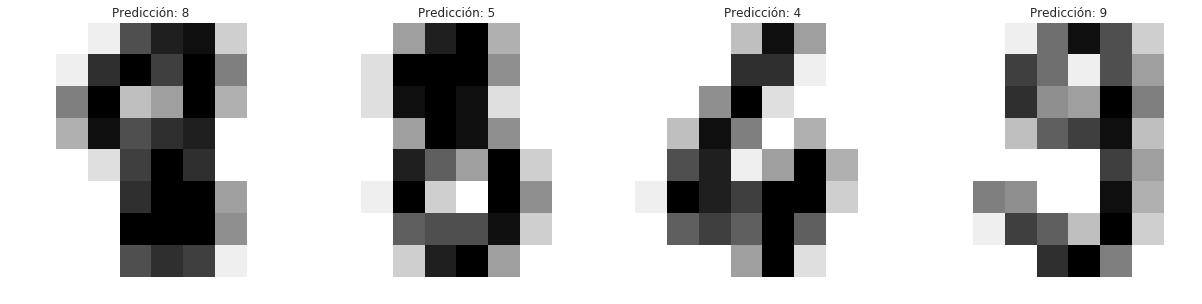

In [15]:
# Mostrar las imágenes clasificadas y el resultado del clasificador de scikit-learn
images_and_predictions = list(zip(digits.images[n_samples // 2 :], predicted))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Predicción: %i" % prediction)

plt.show()

In [16]:
print(
    "Reporte de clasificación para la implementación en este documento :\n%s\n"
    % (classification_report(expected, resultado))
)

Reporte de clasificación para la implementación en este documento :
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        88
           1       0.85      0.85      0.85        91
           2       0.99      0.93      0.96        86
           3       0.95      0.95      0.95        91
           4       1.00      0.76      0.86        92
           5       0.94      0.88      0.91        91
           6       1.00      0.93      0.97        91
           7       0.91      0.96      0.93        89
           8       0.82      0.98      0.89        88
           9       0.78      0.92      0.85        92

   micro avg       0.91      0.91      0.91       899
   macro avg       0.92      0.92      0.92       899
weighted avg       0.92      0.91      0.91       899




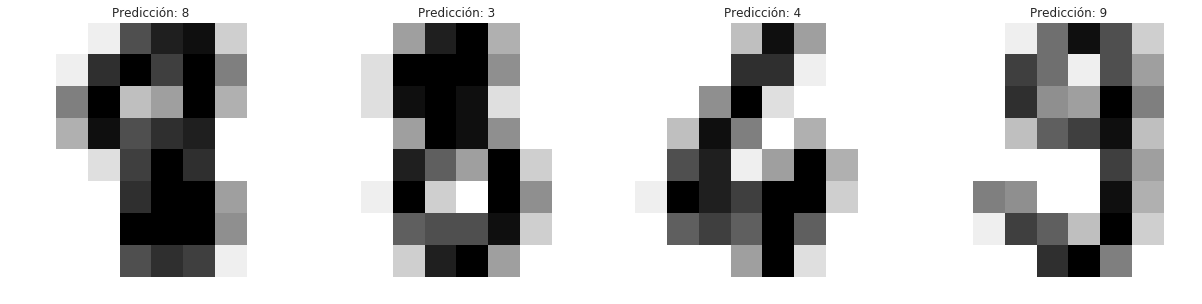

In [17]:
# Mostrar las imágenes clasificadas y el resultado del clasificador de este documento
images_and_predictions = list(zip(digits.images[n_samples // 2 :], resultado))
for index, (image, prediction) in enumerate(images_and_predictions[:4]):
    plt.subplot(2, 4, index + 5)
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    plt.title("Predicción: %i" % prediction)

plt.show()

Se puede observar que la implementación de este documento tiene mejor precisión de clasificación y mejor generalización a datos no conocidos; pero ¿es cierto esto? ¿Se puede estar totalmente seguro de este resultado? En general, los conjuntos de datos son probados muchas veces y se obtiene un promedio de todas las clasificaciones obtenidas. Adicionalmente, es posible que existan problemas de _sobreajuste_ o de varianza en las implementaciones.

Por el momento se dejan los resultados como están, pero teniendo en cuenta que siempre se deben corroborar los resultados obtenidos emplean diferentes técnicas de validación.

 ## Referencias
 1. [_The Elements of Statistical Learning_. Hastie, Tibshirani & Friedman, 2004](https://books.google.com.mx/books?id=yPfZBwAAQBAJ&hl=es&source=gbs_navlinks_s)
 2. [_Pattern Recognition._ Marques de Sa, J.P.](https://books.google.com.mx/books?id=CtipCAAAQBAJ&dq=inauthor:%22J.P.+Marques+de+S%C3%A1%22&hl=es&source=gbs_navlinks_s)
 3. [The Mahalanobis Distance](https://tinyurl.com/y5rmk9dp)